<a href="https://www.kaggle.com/callebiz/google-data-analytics-capstone-case-study?scriptVersionId=84934112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<H1 align="center">  Google Data Analytics Certificate: Capstone Project </H1>

---

## How Can a Wellness Technology Company Play It Smart?

For this case study, I'm playing the part of a junior data analyst for [Bellabeat](https://bellabeat.com/).

Bellabeat is a high-tech manufacturer of health-focused products for women.

## What's expected from me

- Analyze data generated by the smart devices.
- Generate insights on how our customers use our products so our stakeholders can make data-driven decisions.

## About the company
 
- Founded by Urška Sršen and Sando Mur. 
- High-tech company that manufactures health-focused smart products.
- Sršen started this company around the idea of informing and inspiring women worldwide about their health and fitness.
- Rapid growth since opening its doors in 2013. 
- Positioned as a tech-driven wellness company for women.

The case study tells us that Sršen is aware that an analysis of Bellabeat's available consumer data would reveal more growth opportunities. Therefore, she asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data to understand how people are already using their smart devices. 

High-level recommendations for how these trends can inform Bellabeat marketing strategy should be provided.

# Data Analysis Phases

The insights will be presented following the data analysis process steps taught in the Google Data Analytics Professional Certificate:

* **Ask**: What problem are you trying to solve? How can your insights drive business decisions?

* **Prepare**: Where is your data stored? How is the data organized? Is it in long or wide format? Are there issues with bias or credibility in this data? Does your data ROCCC? How are you addressing licensing, privacy, security, and accessibility? How did you verify the data's integrity? How does it help you answer your question? Are there any problems with the data?
 
* **Process**: What tools are you choosing and why? Have you ensured your data's integrity? What steps have you taken to ensure that your data is clean? How can you verify that your data is clean and ready to analyze? Have you documented your cleaning process so you can review and share those results?.

* **Analyze**: How should you organize your data to perform analysis on it? Has your data been adequately formatted? What surprises did you discover in the data? What trends or relationships did you find in the data? How will these insights help answer your business questions?

* **Share**: Were you able to answer the business questions? What story does your data tell? How do your findings relate to your original question? Who is your audience? What is the best way to communicate with them? Can data visualization help you share your findings? Is your presentation accessible to your audience?

* **Act**: What is your final conclusion based on your analysis? How could your team and business apply your insights? What next steps would you or your stakeholders take based on your findings? Is there additional data you could use to expand on your findings?


# **Ask** ❓
---

## The business task 📊

Analyze smart device usage data to understand how people are already using their smart devices. Then, provide high-level recommendations for how these trends can inform Bellabeat marketing strategy.

This analysis is meant to answer the following question:

**How current user trends can guide marketing strategy?**

## The stakeholders 🤵🏻‍♀️🤵🏻‍♂️

* **Urška Sršen**: Bellabeat's cofounder and Chief Creative Oﬃcer
* **Sando Mur**: Mathematician and Bellabeat's cofounder; a key member of the Bellabeat executive team
* **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat's marketing strategy.

# **Prepare/Process** ⚙️:
---

## Getting the data 👨🏻‍💻

How can we answer our main business question? I'm thinking of using only the data from **[FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit)** for now.

This Kaggle data set contains a personal ﬁtness tracker from thirty-three ﬁtbit users. They (the users) consented to submit their personal tracker data, including info about their physical activity, steps, daily activity, heart rate, and sleep.


Should we find it necessary later, I'll consider using other datasets.

Inside the `fitbit` folder, a folder named `Fitabase Data 4.12.16-5.12.16` stores 18 `csv` files with tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

To better read our files let's create a `path` variable to store the folder path containing all `csv` files.

## Importing libraries 📚

The first thing I like to do is to import the libraries that I'll need for the analysis.

In [1]:
import pandas as pd # for data wrangling, basically.
import numpy as np # for aggregate functions like mean, median, etc.
import matplotlib.pyplot as plt # for data visualization
import datetime # to manipulate datetime data.
import seaborn as sns # for data visualization, too.
import sqlite3 as sql # to use SQL syntax in a Python notebook (makes some things easier).
import os

## Checking for integrity ✅

Time for an integrity check. 

There should be 18 file paths in total.

In [2]:
path = '../input/fitbit/Fitabase Data 4.12.16-5.12.16'

## Get the full path of all the csv files.
full_path_list = [os.path.join(path,f) for\
                 f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]

In [3]:
len(full_path_list)

18

Let's check all file paths containing data from Fitbit users:

In [4]:
full_path_list

['../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv',
 '../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv',


## Check for Redundancy 🤔

Five (5) of our tables contain `daily` or `Day` in their names. Let's inspect them for redundant information.

Let's start with `dailyActivity_merged`.

In [5]:
dailyActivity_df = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


We do the same for the `dailyIntensities_merged` table.

In [6]:
dailyIntensities_df = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')

dailyIntensities_df.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


Ok. Both tables have sharing columns. Let's see if they have the same amount of rows.

In [7]:
print(f'dailyActivity_df length: {len(dailyActivity_df)}')
print(f'dailyIntensities_df length: {len(dailyIntensities_df)}')

dailyActivity_df length: 940
dailyIntensities_df length: 940


The table `dailyIntensities_merged` seems to contain data already present in `dailyActivity_merged`. 

### No bueno! 🙅‍♂️

Let's concatenate both tables, dropping all duplicates on all columns related to distance and activity (in minutes). I made sure that unique rows in `dailyIntensities_df` aren't considered by duplicating it.

**Redundancy (final check)**:

If these columns are redundant between both tables, the resulting data frame should **return empty**.

In [8]:
pd.concat([dailyActivity_df, pd.concat([dailyIntensities_df]*2)]).drop_duplicates(['VeryActiveDistance', 
                  'ModeratelyActiveDistance', 
                  'LightActiveDistance', 
                  'SedentaryActiveDistance', 
                  'VeryActiveMinutes',
                  'FairlyActiveMinutes', 
                  'LightlyActiveMinutes', 
                  'SedentaryMinutes'], keep=False)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay


### It worked! Awesome 🙌

Let's inspect the `dailySteps_merged table`, next.

In [9]:
dailySteps_df = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')

In [10]:
dailySteps_df.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


Ok. We're having a similar situation between `dailyActivity_merged` and `dailySteps_merged`. 

Both have columns related to total steps taken.

In `dailyActivity_merged` there's `TotalSteps`.

In `dailySteps_merged` there's `StepTotal`. 

Let's concatanate these tables like we did the first time.

In [11]:
pd.concat([dailyActivity_df, pd.concat([dailySteps_df]*2)]).drop_duplicates(['StepTotal'], keep=False)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,StepTotal


### Good. 👌

Let's repeat the same process for the `Calories` column in `dailyCalories_merged`. Let's read the table first:

In [12]:
dailyCalories_df = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')

In [13]:
pd.concat([dailyActivity_df, pd.concat([dailyCalories_df]*2)]).drop_duplicates(['Calories'], keep=False)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay


### Wooh! 💪

We now know for sure that we don't need the `dailyIntensities_merged`, `dailySteps_merged` and `dailyCalories_merged` tables, since all of the data contained within them is already in the `dailyActivity_merged` table.

## Data Cleaning 🧹
---

### Renaming columns

Let's rename the columns of our `DailyAcitivity` table in `snake_case`. We can visualize all column names first for easy access.

In [14]:
dailyActivity_df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [15]:
#renaming the original dataframe
dailyActivity_df.rename(columns={'Id': 'id',
                                 'ActivityDate':'activity_date',
                                 'TotalSteps': 'total_steps', 
                                 'TotalDistance': 'total_dist', 
                                 'LoggedActivitiesDistance': 'logged_dist', 
                                 'VeryActiveDistance': 'very_active_dist', 
                                 'ModeratelyActiveDistance': 'moderately_active_dist', 
                                 'LightActiveDistance': 'lightly_active_dist', 
                                 'SedentaryActiveDistance': 'sedentary_active_dist', 
                                 'VeryActiveMinutes': 'very_active_mins', 
                                 'FairlyActiveMinutes': 'fairly_active_mins', 
                                 'LightlyActiveMinutes': 'lightly_active_mins', 
                                 'SedentaryMinutes': 'sedentary_mins', 
                                 'Calories': 'calories', }, inplace=True)

### Date formatting 🗓

Let's format the date columns in the standard **YYY-MM-DD**, just because.

(easier on the eyes, imo).

Starting with `dailyActivity_merged`:

In [16]:
dailyActivity_df['activity_date'] = pd.to_datetime(dailyActivity_df['activity_date'])

dailyActivity_df.activity_date.apply(lambda x: x.strftime('%Y%m%d'))

0      20160412
1      20160413
2      20160414
3      20160415
4      20160416
         ...   
935    20160508
936    20160509
937    20160510
938    20160511
939    20160512
Name: activity_date, Length: 940, dtype: object

Let's check our final results!

In [17]:
dailyActivity_df.head()

,id,activity_date,total_steps,total_dist,TrackerDistance,logged_dist,very_active_dist,moderately_active_dist,lightly_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## Sleeping Data 💤

We have an interesting table with sleep data which might come in handy for our analysis. Let's do the same process we did with the `dailyActivity_merged` table.

In [18]:
sleep_df = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

In [19]:
sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [20]:
sleep_df.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [21]:
#renaming the original dataframe
sleep_df.rename(columns={'Id': 'id', 
                         'SleepDay': 'sleep_day', 
                         'TotalSleepRecords': 'total_sleep_records',
                         'TotalMinutesAsleep': 'total_mins_asleep',
                         'TotalTimeInBed': 'total_time_in_bed'}, inplace=True)

In [22]:
sleep_df['sleep_day'] = pd.to_datetime(sleep_df['sleep_day'])

sleep_df.sleep_day.apply(lambda x: x.strftime('%Y%m%d'))

0      20160412
1      20160413
2      20160415
3      20160416
4      20160417
         ...   
408    20160430
409    20160501
410    20160502
411    20160503
412    20160504
Name: sleep_day, Length: 413, dtype: object

In [23]:
sleep_df['day_of_week'] = sleep_df.sleep_day.apply(lambda x: x.strftime('%w'))
sleep_df.head()

,id,sleep_day,total_sleep_records,total_mins_asleep,total_time_in_bed,day_of_week
0,1503960366,2016-04-12,1,327,346,2
1,1503960366,2016-04-13,2,384,407,3
2,1503960366,2016-04-15,1,412,442,5
3,1503960366,2016-04-16,2,340,367,6
4,1503960366,2016-04-17,1,700,712,0


The date now is in the proper `YYYY-MM-DD` format, and we added a day of the week column.

Lastly, let's go the extra mile and extract information on the day, month, year and day of the week (*day_of_week*) from the formated dates:

In [24]:
full_dailyActivity_df = dailyActivity_df.copy()

full_dailyActivity_df['day'] = full_dailyActivity_df.activity_date.apply(lambda x: x.strftime('%d'))
full_dailyActivity_df['month'] = full_dailyActivity_df.activity_date.apply(lambda x: x.strftime('%m'))
full_dailyActivity_df['year'] = full_dailyActivity_df.activity_date.apply(lambda x: x.strftime('%Y'))
full_dailyActivity_df['day_of_week'] = full_dailyActivity_df.activity_date.apply(lambda x: x.strftime('%w'))

We saved the resulting query in a larger dataframe named `full_dailyActivity_df`. Here are the first five rows:

In [25]:
full_dailyActivity_df.head()

,id,activity_date,total_steps,total_dist,TrackerDistance,logged_dist,very_active_dist,moderately_active_dist,lightly_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day,month,year,day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,12,04,2016,2
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,13,04,2016,3
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,14,04,2016,4
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,15,04,2016,5
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,16,04,2016,6


# **Analyze** 📈
---
### Data on Average Calories, Steps and Distance by Id and by day of the week 🏃‍♂️

In [26]:
# make a copy of original df
dailyActivity_df_agg = dailyActivity_df.copy()

# create a new day_of_week column
dailyActivity_df_agg['day_of_week'] = dailyActivity_df_agg.activity_date.apply(lambda x: x.strftime('%w'))

In [27]:
# calculate mean by Id and day of week, rounded by two decimal points
activity_dist = dailyActivity_df_agg.groupby(['id', 'day_of_week']).mean().round(decimals = 2)

# reset df index
activity_dist = activity_dist.reset_index()

# include only necessary columns in df
activity_dist = activity_dist[['id', 'day_of_week', 'calories', 'total_steps', 'total_dist']]

In [28]:
activity_dist.head()

,id,day_of_week,calories,total_steps,total_dist
0,1503960366,0,1769.00,10101.50,6.57
1,1503960366,1,1939.25,13780.75,8.96
2,1503960366,2,1967.80,13946.60,8.92
3,1503960366,3,1868.80,12656.60,8.23
4,1503960366,4,1481.60,9500.60,6.10


### Categorize days: does this day belong to the weekend or is it a weekday? 📅

Let create a column that checks if a certain date happened on the weekend.

We'll first create a custom function that will tell us just that.

If the day of week = 0 (0 being sunday, the first day of the week), or 6 (6 being saturday, last day of the week), then assign `yes` to those rows.

In [29]:
def check_weekend(row):
    """custom function that tells us if a certain date happened on the weekend or not"""

    if row['day_of_week'] == '0':
        val = 'yes'
    elif row['day_of_week'] == '6':
        val = 'yes'
    else:
        val = 'no'
    return val

In [30]:
# make a copy of the original dailyActivity df
activity_weekend = dailyActivity_df.copy()

# add new column extracting only day of the week from the ActivityDate column
activity_weekend['day_of_week'] = activity_weekend.activity_date.apply(lambda x: x.strftime('%w'))

# apply the check_weekend function
activity_weekend['weekend'] = activity_weekend.apply(check_weekend, axis=1)

# drop the day of week column as its no longer needed
activity_weekend.drop('day_of_week', axis=1)

# show first five rows of df to check results
activity_weekend.head()

,id,activity_date,total_steps,total_dist,TrackerDistance,logged_dist,very_active_dist,moderately_active_dist,lightly_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day_of_week,weekend
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2,no
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,3,no
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,4,no
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,5,no
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,6,yes


### Awesome! 👍

## Joining activity data with sleep data

Let's join the activity table with our sleep data:

In [31]:
# inner join the dailyActivity and sleep df
activity_sleep_df = pd.merge(dailyActivity_df, sleep_df, left_on=  ['id', 'activity_date'],
                   right_on= ['id','sleep_day'], 
                   how = 'left')

# keep only relevant columns
activity_sleep_df = activity_sleep_df[['activity_date', 
                                       'sedentary_mins', 
                                       'lightly_active_mins', 
                                       'total_mins_asleep']
                                     ]

# show first five rows of updated df
activity_sleep_df.head()

,activity_date,sedentary_mins,lightly_active_mins,total_mins_asleep
0,2016-04-12,728,328,327.0
1,2016-04-13,776,217,384.0
2,2016-04-14,1218,181,NaN
3,2016-04-15,726,209,412.0
4,2016-04-16,773,221,340.0


## **Initial exploratory visualizations** 📊

### Formatting the style of our seaborn viz:

Let's get the formatting of our seaborn graphs out of the way. We want to make sure that all plots are easy to read, and that we can include multiple graphs at a time.

In [32]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set_context("paper")

### **How users spend their activity time?** ⏰

In our `dailyActivity_df` there are four measures of how users spend their time:
1. `very_active_mins` --> `very_active_dist`
2. `fairly_active_mins` --> `moderately_active_dist`
3. `lightly_active_mins` --> `lightly_active_dist`
4. `sendentary_mins` --> `sedentary_active_dist`

Let's start plotting!

## Plotting

Let's plot each minute-distance pair in a scatter plot.

We'll draw a regression line to get an estimate of the speed users were in during these activities.

<AxesSubplot:xlabel='sedentary_mins', ylabel='sedentary_active_dist'>

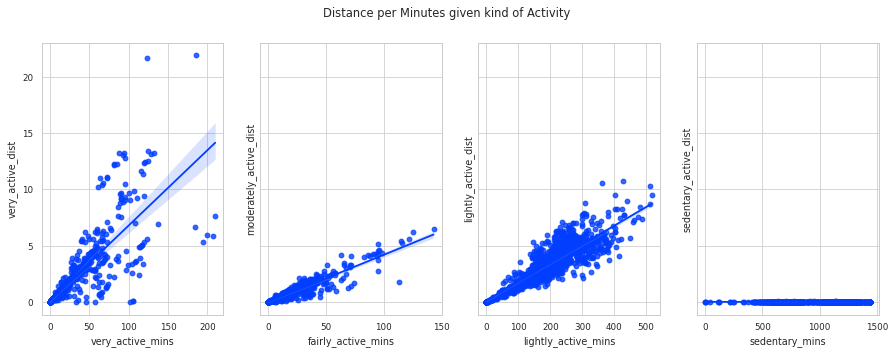

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Distance per Minutes given kind of Activity')

sns.regplot(data = dailyActivity_df, x = 'very_active_mins', y = 'very_active_dist', ax=axes[0])

sns.regplot(data = dailyActivity_df, x = 'fairly_active_mins', y = 'moderately_active_dist', ax=axes[1])

sns.regplot(data = dailyActivity_df, x = 'lightly_active_mins', y = 'lightly_active_dist', ax=axes[2])

sns.regplot(data = dailyActivity_df, x = 'sedentary_mins', y = 'sedentary_active_dist', ax=axes[3])

## For fun, let's try to fit a linear regression line into these graphs, this time representing calories burned instead.

In [34]:
# import LinearRegression from sklearn library.
from sklearn.linear_model import LinearRegression

Our first course of order is to define our inputs and outputs for our model.

Inputs are (`X`). Outputs are (`y`). 

In [35]:
X = full_dailyActivity_df['total_steps'].values.reshape((-1, 1))

y = full_dailyActivity_df['calories'].values

### Let's explain this last cell, briefly:

The `.values` returns a numpy representation (or array) from our dataframe. In this case, the `TotalSteps` column.

`reshape()` transforms our array in 2D format. In other words, it becomes a column with n amounts of rows.

### Let's fit the model into the data and obtian our intercept and slope values.

In [36]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [37]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1665.7426768758332
slope: [0.08351327]


Ok, so our intercept = ~1665.74.

This is our predicted BMR. Let's hold on to that thought for a sec.

Now, lets try to draw this regression line we just generated into the scatterplot we did earlier and see if the fit is similar to the one our regplot created for us.

To draw this regression line, we define an `siline` function to use matplotlib to draw a line in a 2D space from a slope and an intercept.

In [38]:
def siline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color= 'r', ls = '--')

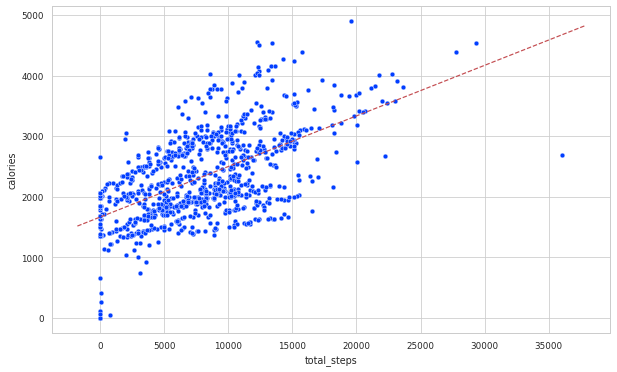

In [39]:
sns.scatterplot(data = full_dailyActivity_df, x= 'total_steps', y ='calories')

siline(model.coef_, model.intercept_);

### Nice 👀 

So, how can we interpret this?

Easy. 

### Apparently, the more steps you take, the more calories you'll burn.

If you look at the intercept of the regression line (where x and y = 0, the base of the line), we can see that people will burn calories EVEN if they decide to take no steps at all. 

In other words, the intercept shows us the basal metabolic rate, or the number of calories you burn on a day at rest.

We can calculate the basal metabolic rate of a person based on their sex, age, weight and height.

For reference, let's use the BMR calculator from [Active](https://www.active.com/fitness/calculators/bmr).

> BMR for a 35 year old man that weighs 175 pounds and stands at 5'11": **1820 cals**

> BMR for a 35 year old woman that weighs 135 pounds and stands at 5'5": **1384 cals**

Alrighty. Let's compare this info with some linear regression magic. We'll start by importing the `scikit-learn` library.


### Let's go deeper.

Let's get the information on BMR, but this time by filtering only those data points with zero steps taken.

We can also get some stats on the calories distribution.

In [40]:
full_dailyActivity_df[full_dailyActivity_df['total_steps']==0]['calories'].describe()

count      77.000000
mean     1657.077922
std       557.082290
min         0.000000
25%      1496.000000
50%      1841.000000
75%      1980.000000
max      2664.000000
Name: calories, dtype: float64

### Here are some observations:

The minimum calories burned seems to be 0. 

There seems to be outliers in our data. Remember that it's impossible for people to burn 0 calories even at a full day of rest (thanks to our BMR).

The maximum amount of calories burned seems to be 2664. Seems about right.

For now, let's focus on the outlier(s).

In [41]:
full_dailyActivity_df[full_dailyActivity_df['calories']== 0]

,id,activity_date,total_steps,total_dist,TrackerDistance,logged_dist,very_active_dist,moderately_active_dist,lightly_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day,month,year,day_of_week
30,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,12,05,2016,4
653,6290855005,2016-05-10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,10,05,2016,2
817,8253242879,2016-04-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,30,04,2016,6
879,8583815059,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,12,05,2016,4


These 4 rows represent instances where users spent 1,440 minutes (a whole day) in a sedentary state. This most likely means that these users had their devices turned off during those days.

No need to have these in our data, so let's get rid of 'em!

In [42]:
full_dailyActivity_df = dailyActivity_df.copy()

full_dailyActivity_df['day'] = full_dailyActivity_df.activity_date.apply(lambda x: x.strftime('%d'))
full_dailyActivity_df['month'] = full_dailyActivity_df.activity_date.apply(lambda x: x.strftime('%m'))
full_dailyActivity_df['year'] = full_dailyActivity_df.activity_date.apply(lambda x: x.strftime('%Y'))
full_dailyActivity_df['day_of_week'] = full_dailyActivity_df.activity_date.apply(lambda x: x.strftime('%w'))

full_dailyActivity_df = full_dailyActivity_df[full_dailyActivity_df['calories'] != 0]

In [43]:
len(full_dailyActivity_df)

936

Cool. 4 outliers dropped, so we're left with a df consisting of 336 rows. Let's see if dropping these outliers makes a difference in our linear regression.

To simplify our flow, let's turn the regression process into a single function:

In [44]:
def get_regression(full_dailyActivity_df, x ='total_steps', y = 'calories'):
    X = full_dailyActivity_df[x].values.reshape((-1, 1))
    y = full_dailyActivity_df[y].values

    model = LinearRegression()
    model.fit(X, y)

    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    sns.scatterplot(data = full_dailyActivity_df, x= x, y =y)
    siline(model.coef_, model.intercept_);

    return (model.intercept_, model.coef_)

intercept: 1689.1510000144017
slope: [0.08138959]


(1689.1510000144017, array([0.08138959]))

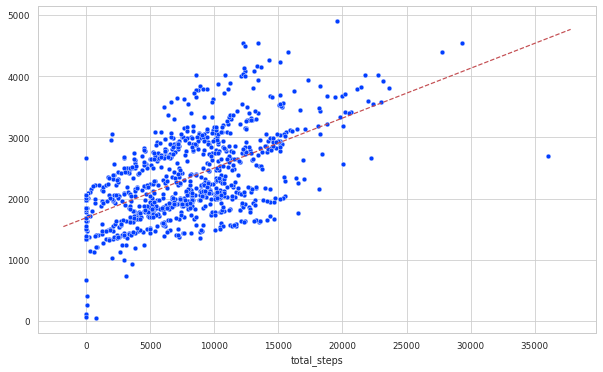

In [45]:
get_regression(full_dailyActivity_df)

Wihtout the outliers, our fit has a slightly higher intercept of ~1,689.15.

### **Distribution according to type of activity**

Apart from time spent in sedentary position, users could also spend

1. Very active minutes
2. Fairly active minutes
or 
3. Very lightly active minutes

Let's use histograms to see how minutes are distributed across these three activities

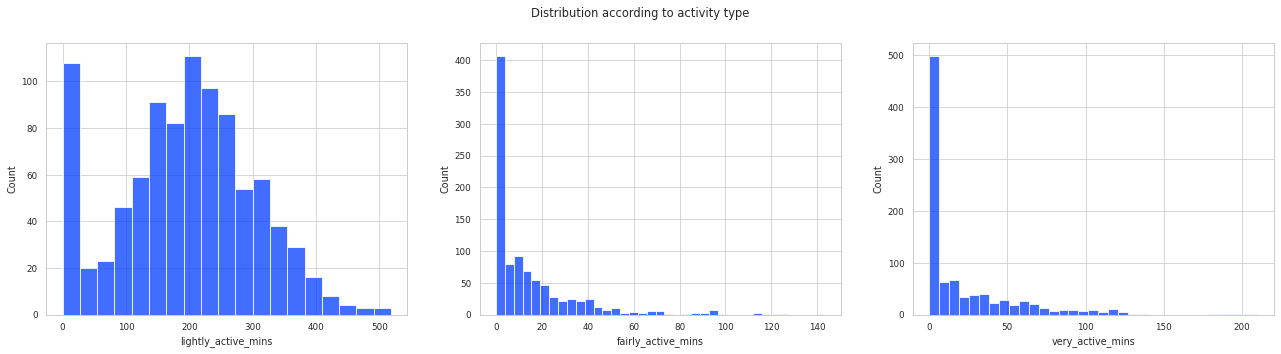

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type')


sns.histplot(data = full_dailyActivity_df, x = 'lightly_active_mins', ax = axes[0]);
sns.histplot(data = full_dailyActivity_df, x = 'fairly_active_mins', ax = axes[1]);
sns.histplot(data = full_dailyActivity_df, x = 'very_active_mins', ax = axes[2]);

The distribution of `LightlyActiveMinutes` is pretty symmetrical.

Most users don't spend much of their time in a very active or fairly active state. 

Makes sense, given that most humans aren't capable of exercising too hard for too long due to lack of stamina and fatigue.

How do we know for how long our clients use our trackers in a day?

I tried exploring other datasets, but adding all activities' minutes is an easy workaround. Assuming all users logged data for the whole day, our addition should equal 1,440 minutes (the total of minutes in a day).

Let's check that!

In [47]:
daily_logs = dailyActivity_df.copy()

daily_logs['day'] = daily_logs.activity_date.apply(lambda x: x.strftime('%d'))
daily_logs['month'] = daily_logs.activity_date.apply(lambda x: x.strftime('%m'))
daily_logs['year'] = daily_logs.activity_date.apply(lambda x: x.strftime('%Y'))
daily_logs['day_of_week'] = daily_logs.activity_date.apply(lambda x: x.strftime('%w'))

daily_logs['total_mins'] = (daily_logs['very_active_mins'] + 
                            daily_logs['fairly_active_mins'] + 
                            daily_logs['lightly_active_mins'] + 
                            daily_logs['sedentary_mins']
                           )

In [48]:
daily_logs = daily_logs[(daily_logs['total_mins'] == 1440) & (daily_logs['calories'] != 0)]

In [49]:
daily_logs.head()

,id,activity_date,total_steps,total_dist,TrackerDistance,logged_dist,very_active_dist,moderately_active_dist,lightly_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day,month,year,day_of_week,total_mins
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,14,04,2016,4,1440
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,18,04,2016,1,1440
10,1503960366,2016-04-22,12764,8.13,8.13,0.0,4.76,1.12,2.24,0.0,66,27,130,1217,1827,22,04,2016,5,1440
15,1503960366,2016-04-27,18134,12.21,12.21,0.0,6.40,0.41,5.41,0.0,78,11,243,1108,2159,27,04,2016,3,1440
22,1503960366,2016-05-04,11100,7.15,7.15,0.0,2.46,0.87,3.82,0.0,36,22,203,1179,1819,04,05,2016,3,1440


In [50]:
print(f'There are {len(daily_logs)} instances where users logged for the whole day.')

There are 474 instances where users logged for the whole day.


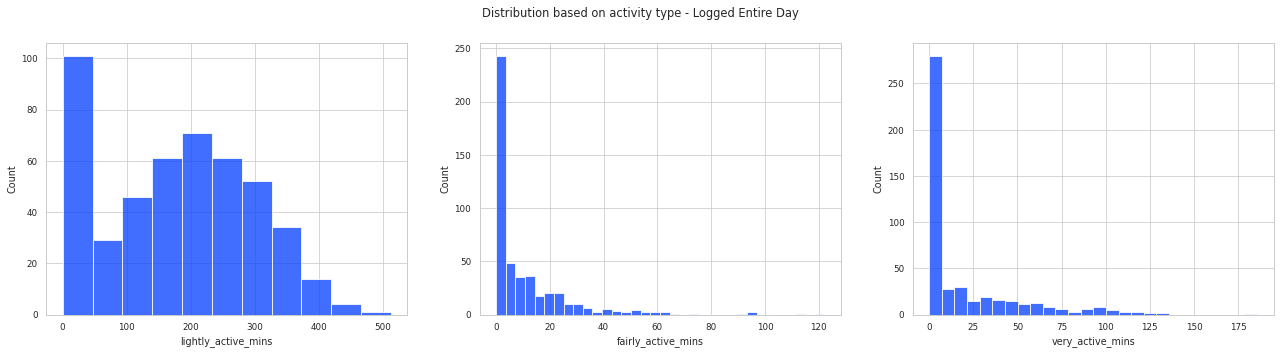

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution based on activity type - Logged Entire Day')

sns.histplot(data = daily_logs, x = 'lightly_active_mins', ax = axes[0])
sns.histplot(data = daily_logs, x = 'fairly_active_mins', ax = axes[1]);
sns.histplot(data = daily_logs, x = 'very_active_mins', ax = axes[2]);

### Similar pattern.

Let's see what happens when we observe those users who didn't record anything in one whole day.

In [52]:
not_daily_logs = dailyActivity_df.copy()

not_daily_logs['day'] = not_daily_logs.activity_date.apply(lambda x: x.strftime('%d'))
not_daily_logs['month'] = not_daily_logs.activity_date.apply(lambda x: x.strftime('%m'))
not_daily_logs['year'] = not_daily_logs.activity_date.apply(lambda x: x.strftime('%Y'))
not_daily_logs['day_of_week'] = not_daily_logs.activity_date.apply(lambda x: x.strftime('%w'))

not_daily_logs['total_mins'] = (not_daily_logs['very_active_mins'] + 
                            not_daily_logs['fairly_active_mins'] + 
                            not_daily_logs['lightly_active_mins'] + 
                            not_daily_logs['sedentary_mins']
                           )

In [53]:
not_daily_logs = not_daily_logs[(not_daily_logs['total_mins'] != 1440) & (not_daily_logs['calories'] != 0)]

In [54]:
not_daily_logs.head()

,id,activity_date,total_steps,total_dist,TrackerDistance,logged_dist,very_active_dist,moderately_active_dist,lightly_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day,month,year,day_of_week,total_mins
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,12,04,2016,2,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,13,04,2016,3,1033
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,15,04,2016,5,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,16,04,2016,6,1040
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,17,04,2016,0,761


In [55]:
print(f'There are {len(not_daily_logs)} instances where users did not log for the whole day.')

There are 462 instances where users did not log for the whole day.


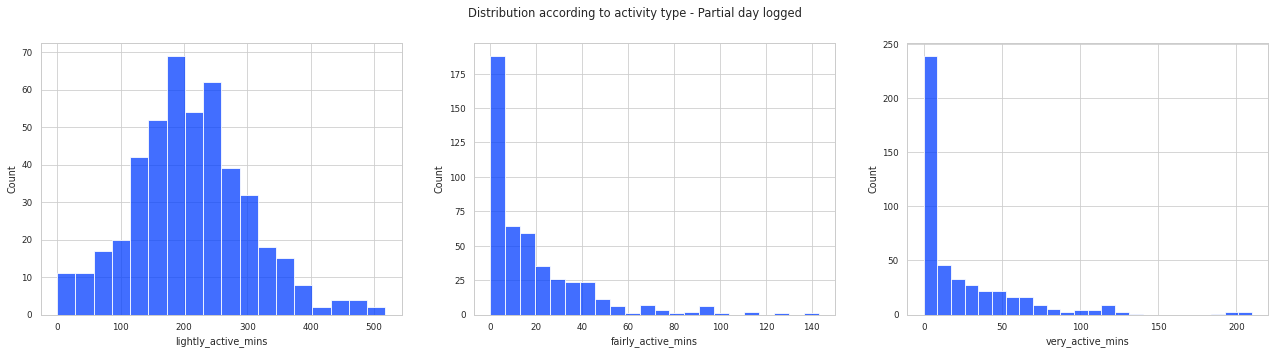

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Partial day logged')

sns.histplot(data = not_daily_logs, x = 'lightly_active_mins', ax = axes[0])
sns.histplot(data = not_daily_logs, x = 'fairly_active_mins', ax = axes[1]);
sns.histplot(data = not_daily_logs, x = 'very_active_mins', ax = axes[2]);

### Now we're onto something! 🙌

It seems that users who use our products throughout the whole day register a lot of `LightlyActiveMinutes`. And it makes sense! More demanding exercises require higher stamina expenditure, so lighter activities predominate. 

By similar logic, it seems that those who log only a part of their day are only using our product when engaging in more demanding exercises.

Let's see the distribution of total logged time in this second group.

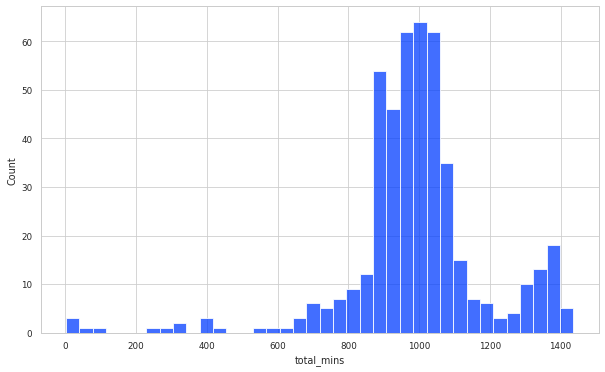

In [57]:
sns.histplot(data = not_daily_logs, x = 'total_mins');

### **Sleeping habits and week day distributions** 🛌

Let's use histograms again to see the distribution of sleeping time for all users.

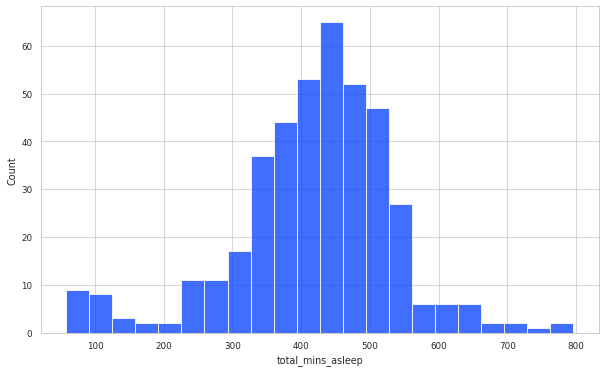

In [58]:
sns.histplot(data = sleep_df, x = 'total_mins_asleep');

It is of general consensus that an adult should get 7-8 hours of sleep per day. 

This corresponds to roughly 420 minutes of sleep. 

Let's see if our users are getting some proper sleep! 😴

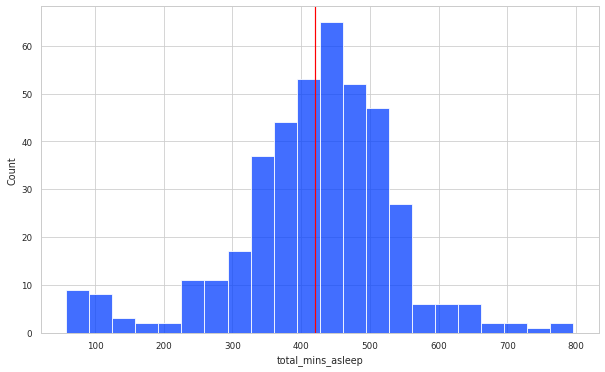

In [59]:
sns.histplot(data = sleep_df, x = 'total_mins_asleep')
plt.axvline(420, 0, 65, color='red');

The distribution is somewhat symmetric with 231 rows to the right of the line (including the line) and 182 rows to the left.

We can further inspect the distribution of minutes asleep per week day. Let's make sure they're displayed in order (from sun to sat).

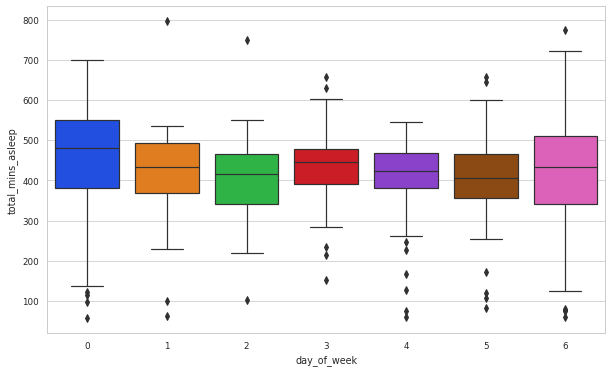

In [60]:
sns.boxplot(x="day_of_week", y="total_mins_asleep", data=sleep_df,
            order = ['0','1','2','3','4','5','6']);

Visually, there's no clear way to distinguish one day with the other. 

Sad.

You would expect to see some difference between the weekday and weekend, but it doesn't seem to be the case.

While we are looking at distributions across days of the week, we can use our `activity_dist` dataframe to inspect the average values of steps, calories and distances:

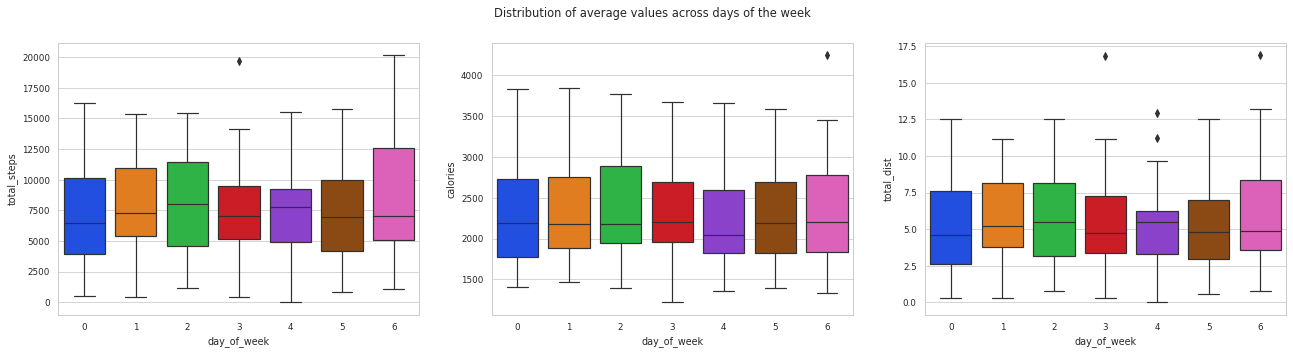

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.boxplot(x="day_of_week", y="total_steps", data=activity_dist, ax=axes[0]);

sns.boxplot(x="day_of_week", y="calories", data=activity_dist, ax=axes[1]);

sns.boxplot(x="day_of_week", y="total_dist", data=activity_dist, ax=axes[2]);

### **Distribution of calories and distance**

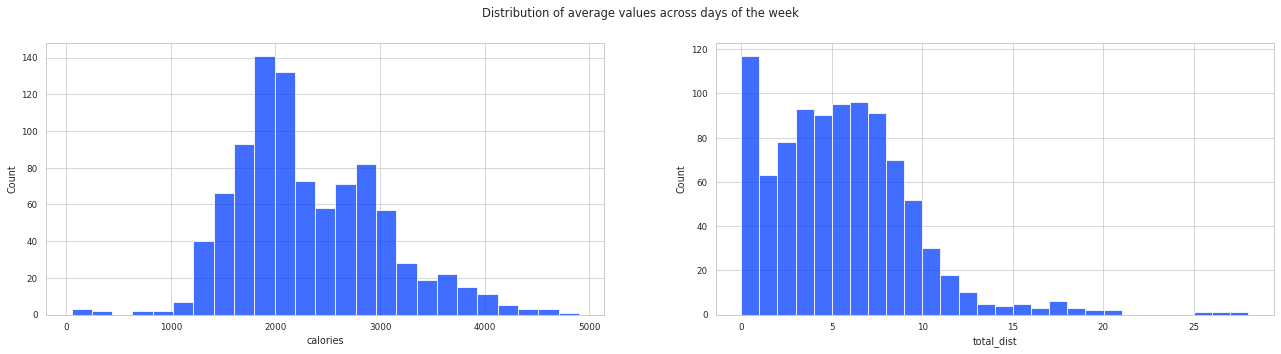

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.histplot(data=full_dailyActivity_df, x="calories", ax = axes[0]);

sns.histplot(data=full_dailyActivity_df, x="total_dist", ax = axes[1]);

The distribution of `Calories` and `TotalDistance` are somewhat skewed to the lower-side.

Is there a correlation between the two?

### **Understanding Sedentary Minutes**

Let's check the distribution of`SedentaryMinutes`:

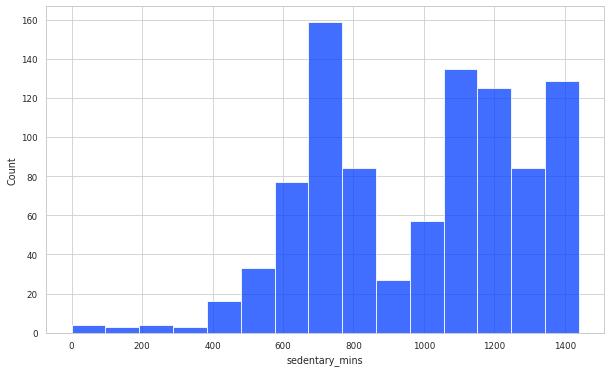

In [63]:
sns.histplot(data= activity_weekend, x = 'sedentary_mins');

I want to double-check and see if there's really no correlation at all between the data and the day of the week.

Let's use our `dailyActivity_df_wknd` dataframe and use a facetplot visualize two groups (weekend = yes, weekend = no).

We need to normalize the distribution given that there are more weekdays than weekends (to our displeasure).

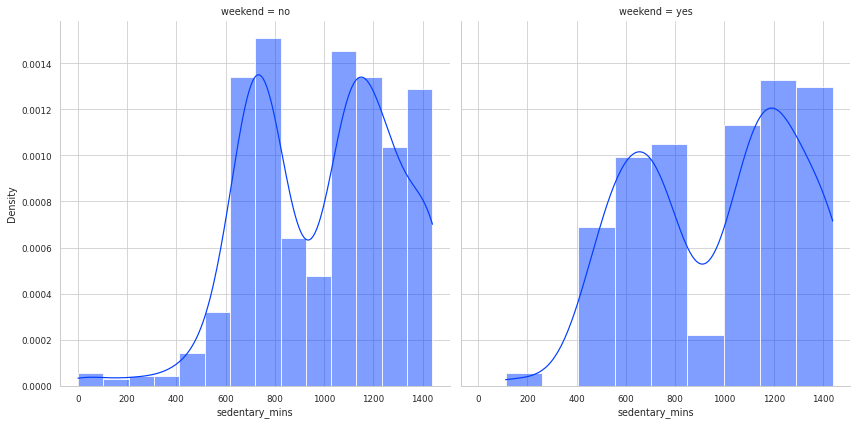

In [64]:
g = sns.FacetGrid(activity_weekend, col="weekend", height=6, aspect=1)
g.map(sns.histplot, "sedentary_mins", kde=True, stat='density');

It seems there are two groups of users based on the distribution of `SedentaryMinutes`. 

Let's obtain some statistics now! Why not start with the good old mean (average)?

In [65]:
# calculate mean by Id and day of week, rounded by two decimal points
avg_sedentary = dailyActivity_df.copy()

# group by ID
avg_sedentary = avg_sedentary.groupby('id').mean()

# order by Sedentary Minutes, in descending oder
avg_sedentary = avg_sedentary.sort_values(by=['sedentary_mins'], ascending = False)

# reset index
avg_sedentary = avg_sedentary.reset_index()

# include only Id and SedentaryMinutes columns in df
avg_sedentary = avg_sedentary[['id', 'sedentary_mins']]

avg_sedentary

,id,sedentary_mins
0,1927972279,1317.419355
1,6775888955,1299.423077
2,8253242879,1287.368421
3,8583815059,1267.225806
4,1624580081,1257.741935
5,4020332650,1237.258065
6,2320127002,1220.096774
7,4057192912,1217.250000
8,1844505072,1206.612903
9,6290855005,1193.034483


### Let's visualize this table in a nice barplot. 📊

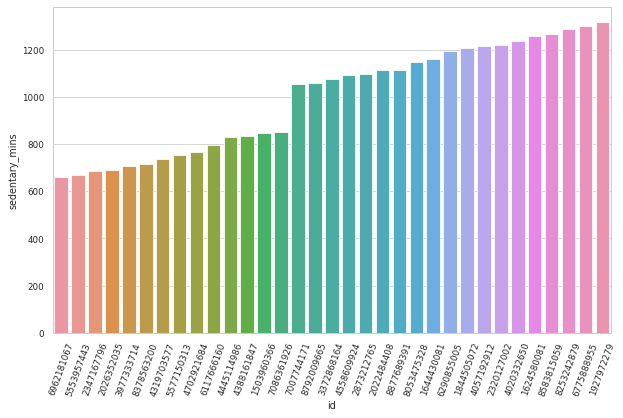

In [66]:
sns.barplot(data = avg_sedentary,
            x = 'id', y = 'sedentary_mins',
            order = avg_sedentary.sort_values('sedentary_mins',ascending = True)['id'])
plt.xticks(rotation=70);

Now, let's calculate the average minutes spent in sedentary position, just because.

In [67]:
mean_sedentary_minutes = np.mean(dailyActivity_df['sedentary_mins'])

mean_sedentary_minutes

991.2106382978724

A good idea I found in other kagglers' notebooks was to group users based on specific criteria.

Let's group users based on above-average sedentary minutes spent, and below-average sedentary minutes spent.

In [68]:
def above_below(user):
    '''Returns 1 if user has above-average SedentaryMinutes and 0 otherwise'''
    return int(avg_sedentary[avg_sedentary['id']==user]['sedentary_mins'].values[0] > mean_sedentary_minutes)

In [69]:
activity_weekend['user_group'] = activity_weekend['id'].apply(above_below)

In [70]:
# Rows in each group
print(f'How many rows in group 0 (Less Sedentary group)?:')
print(len(activity_weekend[activity_weekend['user_group']==0]))
print(f'How many rows in group 1 (More Sedentary group)?:')
print(len(activity_weekend[activity_weekend['user_group']==1]))

#Distinct users in each group
print('Super-lazy, unique users (Less Sedentary group):')
print(activity_weekend[activity_weekend['user_group']==0]['id'].nunique())

print('Super-active, unique users (More Sedentary group):')
print(activity_weekend[activity_weekend['user_group']==1]['id'].nunique())

How many rows in group 0 (Less Sedentary group)?:
416
How many rows in group 1 (More Sedentary group)?:
524
Super-lazy, unique users (Less Sedentary group):
14
Super-active, unique users (More Sedentary group):
19


Let's visualize the number of instances per group

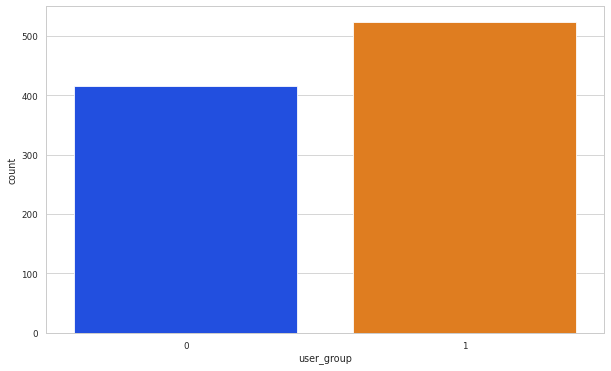

In [71]:
sns.countplot(data=activity_weekend, x = 'user_group');

A boxplot should help us see a clear difference between the two groups

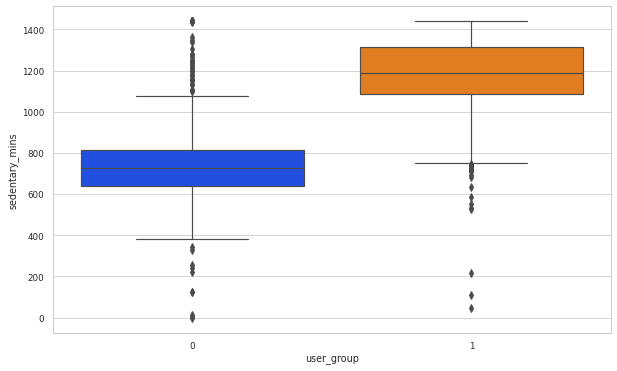

In [72]:
sns.boxplot(x="user_group", y="sedentary_mins", data=activity_weekend);

Group 1 is more sedentary, given that its `SedentaryMinutes` median is higher.

Now, let's see if there's a difference between weekdays and weekends.

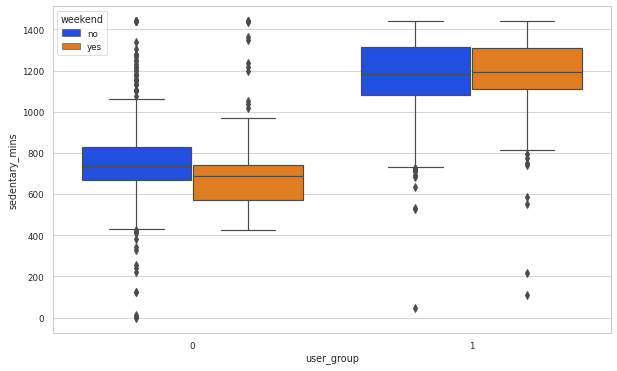

In [73]:
sns.boxplot(x="user_group", y="sedentary_mins", hue = 'weekend', data=activity_weekend);

Let's see if the distribution for the less sedentary group varies between weekdays and weekends

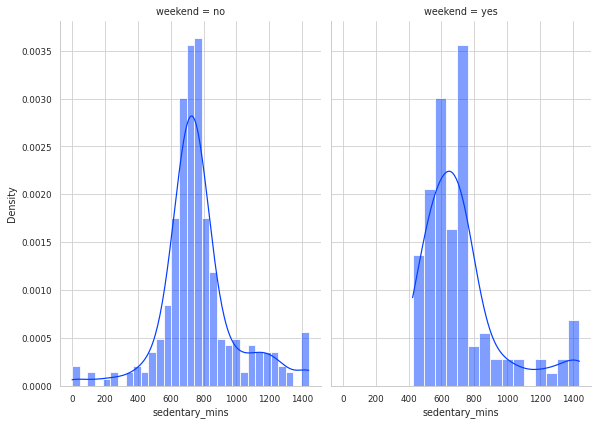

In [74]:
g = sns.FacetGrid(activity_weekend[activity_weekend['user_group']==0], col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "sedentary_mins", kde=True, stat='density');

Ok we found something interesting.

During weekends, people seem to be a little more active. This is probably because people work during weekdays and thus are bound to their desks (assuming most users in this analyze work at desk jobs).

### **Do average values change on weekends?**

___

In [75]:
# make a copy of the original dailyActivity df
weekend_avg = dailyActivity_df.copy()

# add new column extracting only day of the week from the ActivityDate column
weekend_avg['day_of_week'] = weekend_avg.activity_date.apply(lambda x: x.strftime('%w'))

# apply the check_weekend function
weekend_avg['weekend'] = weekend_avg.apply(check_weekend, axis=1)

# drop the day of week column as its no longer needed
weekend_avg.drop('day_of_week', axis=1)

# group by weekend
weekend_avg = weekend_avg.groupby('weekend').mean()

# keep only relevant columns
weekend_avg = weekend_avg[['sedentary_mins', 'calories', 'total_steps', 'total_dist']]

In [76]:
weekend_avg

,sedentary_mins,calories,total_steps,total_dist
weekend,,,,
no,996.181295,2301.516547,7668.699281,5.505108
yes,977.110204,2309.546939,7550.571429,5.446000


There seems to be a small difference, but nothing too significant...

### **Sleeping habits for each user group**
---

In [77]:
sleep_df['user_group'] = sleep_df['id'].apply(above_below)

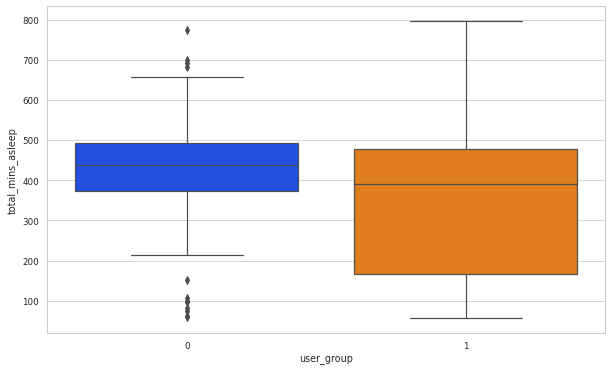

In [78]:
sns.boxplot(x="user_group", y="total_mins_asleep", data=sleep_df);

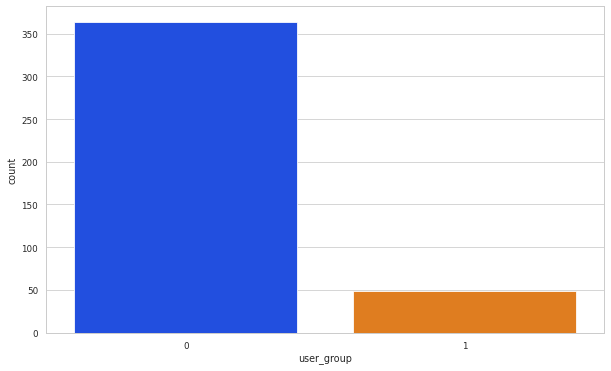

In [79]:
sns.countplot(data = sleep_df, x = 'user_group');

Number of rows in each group (in the `sleep_df` dataframe):

In [80]:
sleep_df['user_group'].value_counts()

0    364
1     49
Name: user_group, dtype: int64

In [81]:
print('Distinct users in group 0 (Less Sedentary group)')
print(sleep_df[sleep_df['user_group']==0]['id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(sleep_df[sleep_df['user_group']==1]['id'].nunique())

Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
10


### Something's odd.

- 364 records of daily sleep activity for the less sedentary group 
- 49 records of daily sleep activity for thethe more sedentary group.
- total number of unique users from the less sedentary group is 14
- total number of unique users from the more sedentary group is 10

## Going back to our Activity and Sleep table
---

Let's go back to our `activity_sleep_df` dataframe, which essentially was an inner join of the `dailyActivity` and `SleepDay` tables.

In [82]:
activity_sleep_df.head()

,activity_date,sedentary_mins,lightly_active_mins,total_mins_asleep
0,2016-04-12,728,328,327.0
1,2016-04-13,776,217,384.0
2,2016-04-14,1218,181,NaN
3,2016-04-15,726,209,412.0
4,2016-04-16,773,221,340.0


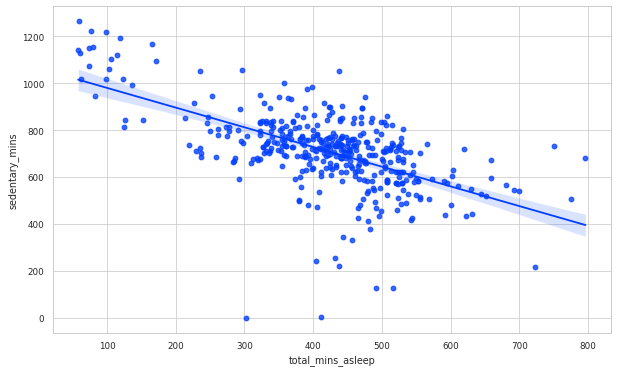

In [83]:
sns.regplot(data = activity_sleep_df,
                x = 'total_mins_asleep',
                y = 'sedentary_mins');

Awesome!

It seems that the more you sleep, the less sedentary you are while awake. Makes sense!


# Share 🤝
---

Ok. We've done some good analysis, and found some interesting patterns. Let's see if we can answer the big question.

Remember, we're trying to understand how current user trends can guide Bellabeat's marketing strategy.

We'll start our sharing with some basic descriptions.

> Our dataset has data on 33 different users who logged their daily activities between 03.12.2016 and 05.12.2016.

## Describing the data

The main data on daily activities is in the full_dailyActivity_df.

Let's get some high-level statistics with the `describe()` method:

## Questions I want to answer

In this share phase, I want to answer some questions that might lead to some marketing strategy efforts:

- distributions by activity type, by calories and distance, and by sleep.
- if the day of the week affects behavior
- if steps affect calories burned
- how long do people stay sedentary in a day?
- does sleep affect sedentary time?

In [84]:
full_dailyActivity_df.loc[:, full_dailyActivity_df.columns != 'id'].describe().T

,count,mean,std,min,25%,50%,75%,max
total_steps,936.0,7670.551282,5073.379140,0.0,3818.000,7441.000,10733.5000,36019.000000
total_dist,936.0,5.513162,3.916497,0.0,2.645,5.265,7.7200,28.030001
TrackerDistance,936.0,5.498750,3.899143,0.0,2.645,5.265,7.7125,28.030001
logged_dist,936.0,0.108633,0.621181,0.0,0.000,0.000,0.0000,4.942142
very_active_dist,936.0,1.509103,2.662802,0.0,0.000,0.220,2.0900,21.920000
moderately_active_dist,936.0,0.569968,0.884687,0.0,0.000,0.240,0.8000,6.480000
lightly_active_dist,936.0,3.355096,2.033258,0.0,1.960,3.380,4.7900,10.710000
sedentary_active_dist,936.0,0.001613,0.007361,0.0,0.000,0.000,0.0000,0.110000
very_active_mins,936.0,21.255342,32.885736,0.0,0.000,4.000,32.0000,210.000000
fairly_active_mins,936.0,13.622863,20.010368,0.0,0.000,7.000,19.0000,143.000000


For the sleep habits data, we can use the `describe()` method on the `sleep_df` dataframe:

In [85]:
sleep_df.loc[:, sleep_df.columns != 'id'].describe()

,total_sleep_records,total_mins_asleep,total_time_in_bed,user_group
count,413.000000,413.000000,413.000000,413.000000
mean,1.118644,419.467312,458.639225,0.118644
std,0.345521,118.344679,127.101607,0.323761
min,1.000000,58.000000,61.000000,0.000000
25%,1.000000,361.000000,403.000000,0.000000
50%,1.000000,433.000000,463.000000,0.000000
75%,1.000000,490.000000,526.000000,0.000000
max,3.000000,796.000000,961.000000,1.000000


## **Distributions**
 ---

### **By acivity type**

Let's check all activity types, expect SedentaryMinutes which we will analyze separately.

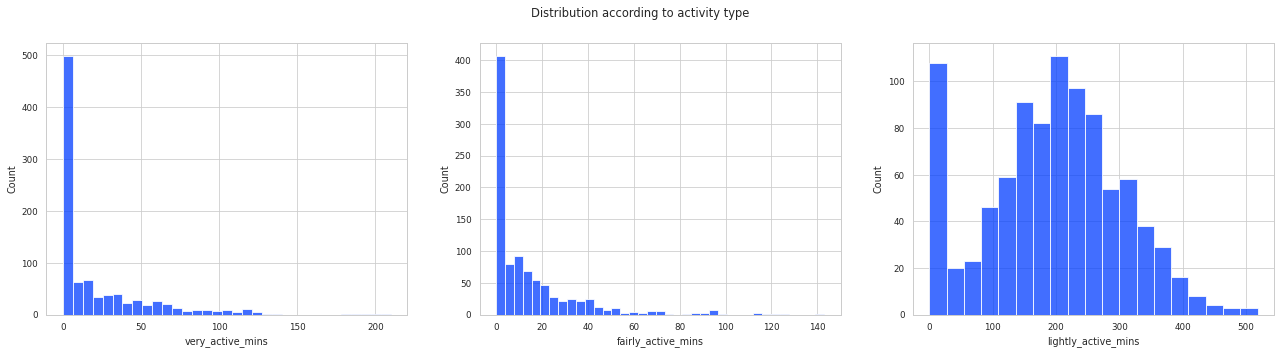

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type')

sns.histplot(data = full_dailyActivity_df, x = 'very_active_mins', ax = axes[0]);

sns.histplot(data = full_dailyActivity_df, x = 'fairly_active_mins', ax = axes[1]);

sns.histplot(data = full_dailyActivity_df, x = 'lightly_active_mins', ax = axes[2]);

Of all 940 original rows in our data, only 462 rows have partially logged their activities in a day. For these records:

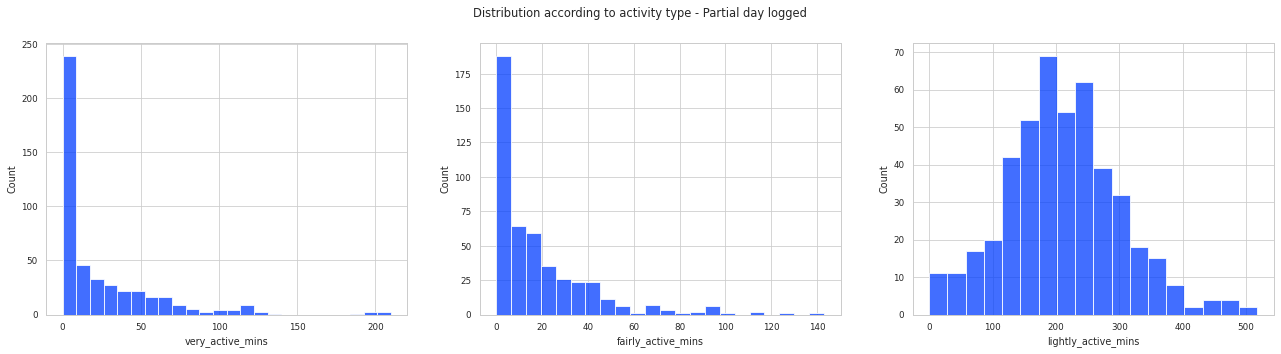

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Partial day logged')

sns.histplot(data = not_daily_logs, x = 'very_active_mins', ax = axes[0]);

sns.histplot(data = not_daily_logs, x = 'fairly_active_mins', ax = axes[1]);

sns.histplot(data = not_daily_logs, x = 'lightly_active_mins', ax = axes[2]);

The `LightlyActiveMinutes` distribution is very symmetric with no peak at very few minutes of activity. Users who log the entire day may end up registering a lot of `LightlyActiveMinutes` while those who log only a part of the day might be registering only activities with higher demand.

Let's see the distribution of total logged time in this second group.

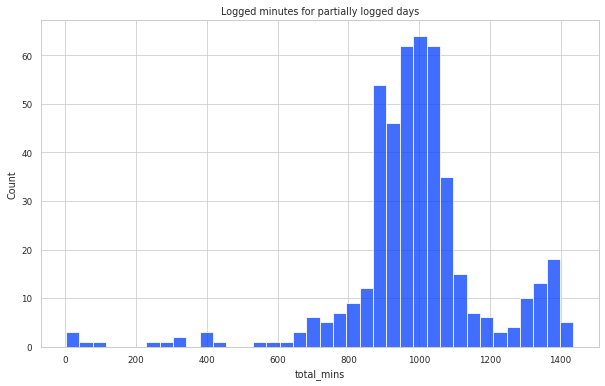

In [88]:
sns.histplot(data = not_daily_logs, x = 'total_mins')
plt.title('Logged minutes for partially logged days');

### **By calories and distance**

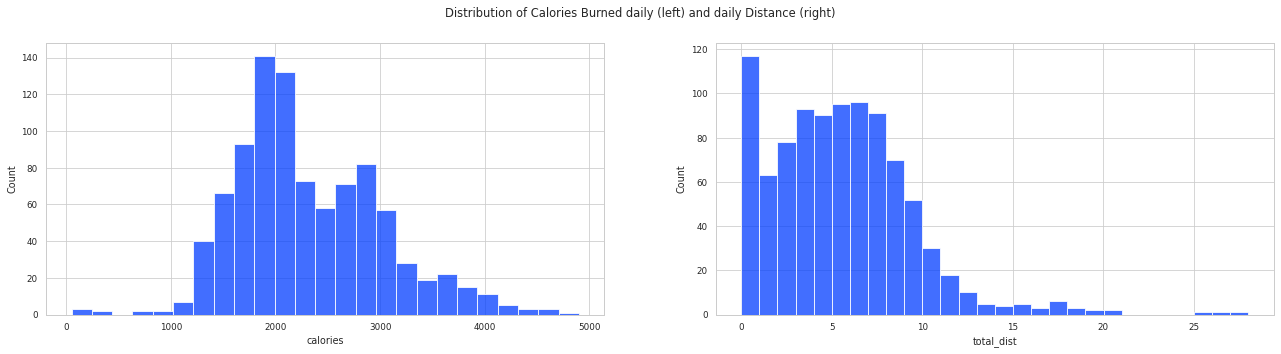

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribution of Calories Burned daily (left) and daily Distance (right)')

sns.histplot(data=full_dailyActivity_df, x="calories", ax = axes[0]);

sns.histplot(data=full_dailyActivity_df, x="total_dist", ax = axes[1]);

The distribution of burned calories is a bit skewed to the low calories while the distance distribtion is highly skewed to lower distances.

### **By sleeping patterns**

Text(380, 30, '7h of sleep')

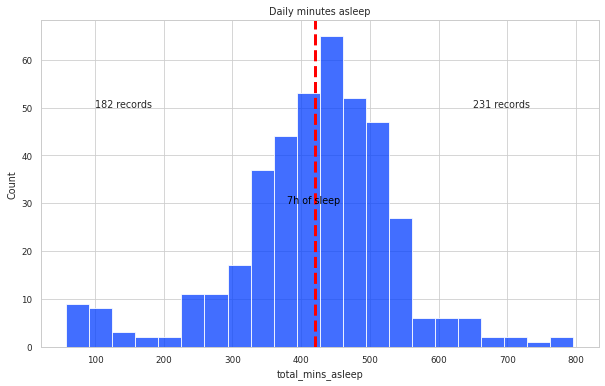

In [90]:
sns.histplot(data = sleep_df, x = 'total_mins_asleep')
plt.title('Daily minutes asleep')

plt.axvline(420, 0, 65, color='red', ls = '--', lw = 3);

plt.annotate('182 records', (100,50))
plt.annotate('231 records', (650,50))
plt.annotate('7h of sleep', (380,30), color='black')

## **Behavior based on day of the week**
---
Does the day of the week affect user behavior? Is this effect considerable enough to market some functionaly built around this?

### Let's find out!

## Steps, Calories, and Distance

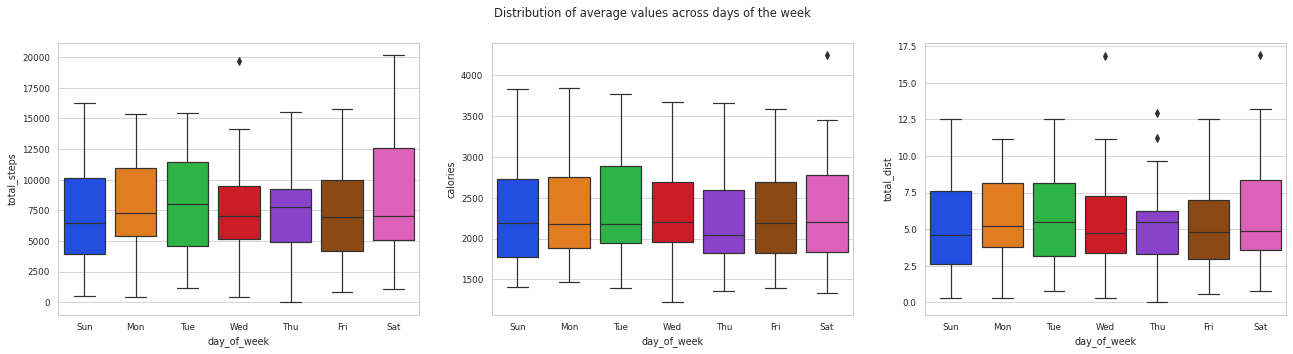

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.boxplot(x="day_of_week", y="total_steps", data=activity_dist, ax=axes[0]).set_xticklabels(['Sun',
                                                                                               'Mon',
                                                                                               'Tue',
                                                                                               'Wed',
                                                                                               'Thu',
                                                                                               'Fri', 
                                                                                               'Sat']
                                                                                             );

sns.boxplot(x="day_of_week", y="calories", data=activity_dist, ax=axes[1]).set_xticklabels(['Sun',
                                                                                            'Mon',
                                                                                            'Tue',
                                                                                            'Wed',
                                                                                            'Thu',
                                                                                            'Fri', 
                                                                                            'Sat']
                                                                                          );

sns.boxplot(x="day_of_week", y="total_dist", data=activity_dist, ax=axes[2]).set_xticklabels(['Sun',
                                                                                              'Mon',
                                                                                              'Tue',
                                                                                              'Wed',
                                                                                              'Thu',
                                                                                              'Fri', 
                                                                                              'Sat']
                                                                                            );

With the current data, there is no considerable difference between the average Steps Taken, Calories Burned or Distance across different days of the week.

## **Sleep**

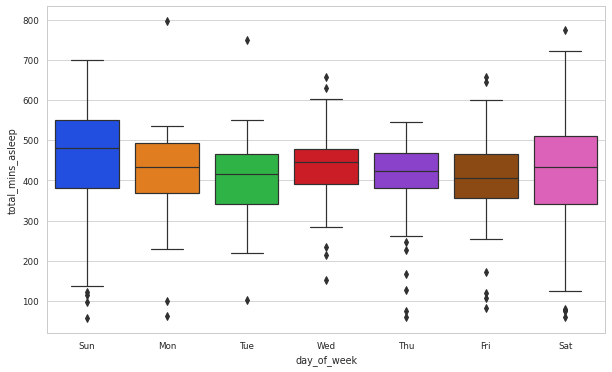

In [92]:
sns.boxplot(x="day_of_week", y="total_mins_asleep", data=sleep_df,
            order = ['0','1','2','3','4','5','6']).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

No significant difference between days.

## **Steps**: Do steps affect calorie expenditure?

---

intercept: 1689.1510000144017
slope: [0.08138959]


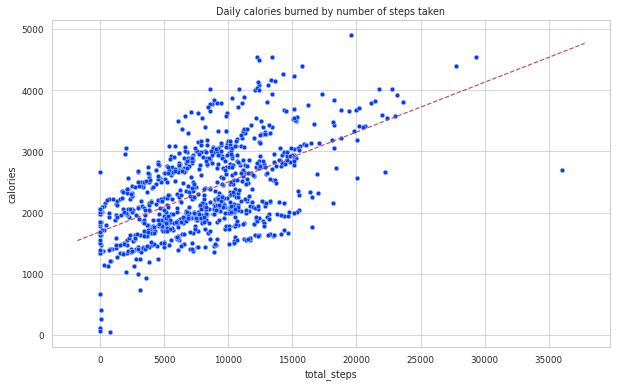

In [93]:
get_regression(full_dailyActivity_df)
plt.ylabel('calories')
plt.title('Daily calories burned by number of steps taken');

### Indeed!

As you'd probably expect, the more steps you take, the more calories you'll burn.

Remember that the base of our intercept will never be zero (0) because its impossible to burn zero calories in a day thanks to our BMR (basal metabolic rate).

BMR means that even if you stay completely still for 24 hours, your body will still burn calories.

In [94]:
full_dailyActivity_df[full_dailyActivity_df['total_steps']==0]['calories'].describe()

count      73.000000
mean     1747.876712
std       408.255433
min        57.000000
25%      1557.000000
50%      1841.000000
75%      1981.000000
max      2664.000000
Name: calories, dtype: float64

### **How long do users spend being sedentary in a day?**
---

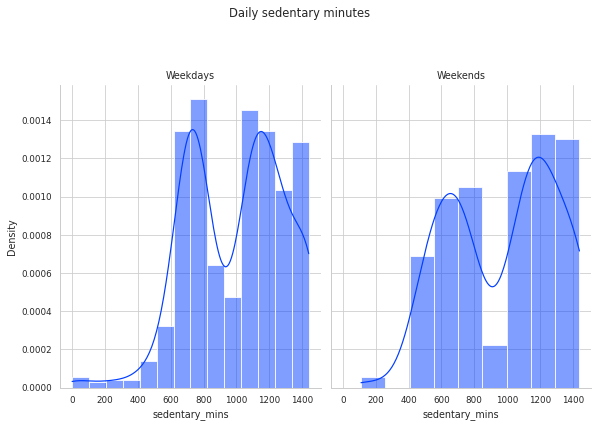

In [95]:
g = sns.FacetGrid(activity_weekend, col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "sedentary_mins", kde=True, stat='density')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Daily sedentary minutes')
axes = g.axes.flatten()
axes[0].set_title("Weekdays")
axes[1].set_title("Weekends");

It seems there are two groups of users based on the distribution of `SedentaryMinutes`.
We can see the average `SedentaryMinutes` per user:

### **Do average values change on weekends?**

In [96]:
weekend_avg

,sedentary_mins,calories,total_steps,total_dist
weekend,,,,
no,996.181295,2301.516547,7668.699281,5.505108
yes,977.110204,2309.546939,7550.571429,5.446000


There's a slight difference, but nothing to right home about.

## **Do sleep habits influence sedentary time?**

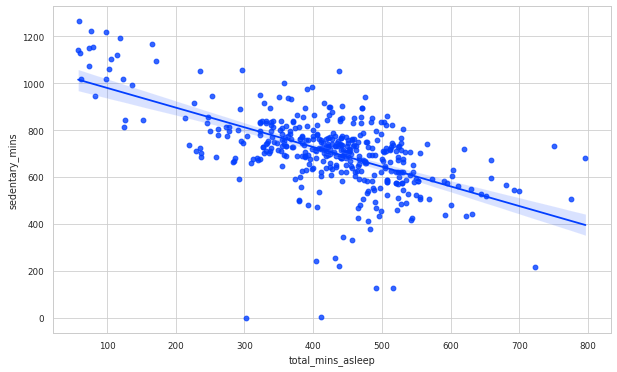

In [97]:
sns.regplot(data = activity_sleep_df,
                x = 'total_mins_asleep',
                y = 'sedentary_mins');

This is an interesting graph: there is a clear tendency of **users with more minutes asleep to be less sedentary**. 

So, one conclusion might be that the more you sleep, the more active you are during the day!

# **Act** 🏃‍♂️🏃‍♀️
---

Aaaaaand we're done!

Based on our analysis, we've obtained some interesting insights.


## Steps:
- There's no apparent correlation between the day of the week and the level of activity.
- Users take 7670 steps on average; according to a [2011 study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3197470/), the recommended amount of steps per day is 10,000 in healthy adults. Another cool note is that people who track their steps take ~2,500 more steps than those who don't. Walking is generally associated with a lower mortality risk.
- There's a direct correlation between steps taken and calories burned. So we could design a model that predicts how many steps a user should take to burn x calories. The model would consider gender, age, weight, and height variables. Then, we could take those same variables to calculate the user's BMR.

## Sleep:
- There's an inversely proportional relation between minutes of sleep and minutes of sedentary activity. The more you sleep, the more likely you will spend LESS time in a sedentary state. We could implement tools that remind users to sleep at a particular time. We could offer sleep-tracking services that allow users to sleep optimally. This should also motivate users to wear our products all day, which means more data to improve our product!

Conclusions: We should develop software that allows users to track their steps in real-time. Some gamification (achievements, motivational messages per steps taken, etc.) could also be implemented to promote more step-taking! Sleep tracking should also help our users take better care of their health by adopting healthier habits while awake!


# **FIN.**

And that's it for now.

I had tons of fun doing this. The python community is fantastic, and this project couldn't have been possible without the inspiration of other people's work.

Feedback is more than welcome!